In [1]:
from stats import FeatureType
import pandas as pd
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

## generate a dummy dataset

In [3]:
def generate_fake_data(features_scope: dict, num_rows: int=10) -> pd.DataFrame:
    """Generate a dummy dataset with a given number of rows.

    Args:
        features_scope: A dictionary with the features and their types.
        num_rows: The number of rows to generate.
    """
    data = {}
    for feature, spec in features_scope.items():
        if spec in {FeatureType.FLOAT, FeatureType.FLOAT.value}:
            data[feature] = np.random.randn(num_rows)  # Normal distribution for floats
        elif spec in {FeatureType.INTEGER_CATEGORICAL, FeatureType.INTEGER_CATEGORICAL.value}:
            data[feature] = np.random.randint(0, 5, size=num_rows)  # Integer categories from 0 to 4
        elif spec in {FeatureType.STRING_CATEGORICAL, FeatureType.STRING_CATEGORICAL.value}:
            categories = ['cat', 'dog', 'fish', 'bird']
            data[feature] = np.random.choice(categories, size=num_rows)  # Randomly chosen string categories
    # Create the DataFrame
    df = pd.DataFrame(data)
    return df


In [4]:
fs = {
    "feature_d": "float",
    "feat_a": FeatureType.FLOAT,
    "feat_b": FeatureType.INTEGER_CATEGORICAL,
    "feat_c": FeatureType.STRING_CATEGORICAL,
}

In [5]:
FeatureType.FLOAT.value

'float'

In [6]:
for feature, spec in fs.items():
    break

In [7]:
spec_value = spec.value if isinstance(spec, FeatureType) else spec

In [8]:
spec_value

'float'

In [9]:
df = generate_fake_data(fs, 10)

In [10]:
df

,feature_d,feat_a,feat_b,feat_c
0,-0.942157,0.322416,4,fish
1,-0.757208,-1.110492,1,fish
2,0.174981,-0.487326,0,dog
3,1.035596,0.924252,4,cat
4,-1.439356,-1.484796,4,bird
5,-0.152945,-1.111271,4,dog
6,-0.391092,-0.115313,2,cat
7,-2.519040,0.433061,2,cat
8,-0.733282,-0.738903,3,cat
9,-0.001465,0.706782,0,fish


In [11]:
df.to_csv("data/fake_data.csv", index=False)

## Preprocessor testing

In [14]:
from processor import PreprocessingModel

In [15]:
ppr = PreprocessingModel(
    path_data="data/fake_data.csv",
    features_specs=fs,
)

2024-03-13 13:31:03.177 | DEBUG    | processor:_init_stats:90 - Features Specs: {'feature_d': 'float', 'feat_a': <FeatureType.FLOAT: 'float'>, 'feat_b': <FeatureType.INTEGER_CATEGORICAL: 'integer_categorical'>, 'feat_c': <FeatureType.STRING_CATEGORICAL: 'string_categorical'>}
2024-03-13 13:31:03.177 | INFO     | processor:_init_stats:93 - No features stats provided, trying to load local file 🌪️
2024-03-13 13:31:03.178 | INFO     | kdp.stats:_parse_features_specs:162 - Parsing features specifications ...
2024-03-13 13:31:03.179 | DEBUG    | kdp.stats:_parse_features_specs:166 - Processing feature ='feature_d' with spec_value ='float'
2024-03-13 13:31:03.179 | DEBUG    | kdp.stats:_parse_features_specs:170 - Adding feature ='feature_d' as a numeric feature
2024-03-13 13:31:03.180 | DEBUG    | kdp.stats:_parse_features_specs:166 - Processing feature ='feat_a' with spec_value ='float'
2024-03-13 13:31:03.180 | DEBUG    | kdp.stats:_parse_features_specs:170 - Adding feature ='feat_a' as a n

In [16]:
ppr.build_preprocessor()

2024-03-13 13:31:04.083 | INFO     | processor:build_preprocessor:316 - Processing feature type: _key = 'numeric_stats'
2024-03-13 13:31:04.085 | INFO     | processor:build_preprocessor:319 - Processing feature_name = 'feature_d', dtype = tf.float32 📊
2024-03-13 13:31:04.086 | DEBUG    | processor:_add_input_column:125 - Adding feature_name = 'feature_d', dtype =tf.float32 to the input columns
2024-03-13 13:31:04.089 | DEBUG    | processor:_add_input_signature:139 - Adding feature_name = 'feature_d', dtype =tf.float32 to the input signature
2024-03-13 13:31:04.090 | INFO     | kdp.pipeline:__init__:38 - 🔂 Initializing New Pipeline for: feature_d
2024-03-13 13:31:04.091 | INFO     | kdp.pipeline:add_step:47 - Adding new preprocessing layer: <Normalization name=norm_feature_d, built=False> to the pipeline ➕
2024-03-13 13:31:04.095 | INFO     | processor:build_preprocessor:319 - Processing feature_name = 'feat_a', dtype = tf.float32 📊
2024-03-13 13:31:04.095 | DEBUG    | processor:_add_in

Model: "preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ feat_b (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ feat_c (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lookup_feat_b       │ (None, 1)         │          0 │ feat_b[0][0]      │
│ (IntegerLookup)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lookup_feat_c       │ (None, 1)         │          0 │ feat_c[0][0]      │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ feature_d           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ feat_a (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embed_feat_b        │ (None, 1, 4)      │         24 │ lookup_feat_b[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embed_feat_c        │ (None, 1, 3)      │         15 │ lookup_feat_c[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ norm_feature_d      │ (None, 1)         │          0 │ feature_d[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ norm_feat_a         │ (None, 1)         │          0 │ feat_a[0][0]      │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_feat_b      │ (None, 4)         │          0 │ embed_feat_b[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_feat_c      │ (None, 3)         │          0 │ embed_feat_c[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 9)         │          0 │ norm_feature_d[0… │
│ (Concatenate)       │                   │            │ norm_feat_a[0][0… │
│                     │                   │            │ flatten_feat_b[0… │
│                     │                   │            │ flatten_feat_c[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 39 (156.00 B)

 Trainable params: 39 (156.00 B)

 Non-trainable params: 0 (0.00 B)

2024-03-13 13:31:04.141 | INFO     | processor:build_preprocessor:368 - Preprocessor Model built successfully ✅, summary: None
2024-03-13 13:31:04.141 | INFO     | processor:build_preprocessor:369 - Imputs: dict_keys(['feature_d', 'feat_a', 'feat_b', 'feat_c'])
2024-03-13 13:31:04.141 | INFO     | processor:build_preprocessor:370 - Output model mode: concat with size: 9


{'model': <Functional name=preprocessor, built=True>,
 'inputs': {'feature_d': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=feature_d>,
  'feat_a': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=feat_a>,
  'feat_b': <KerasTensor shape=(None, 1), dtype=int32, sparse=None, name=feat_b>,
  'feat_c': <KerasTensor shape=(None, 1), dtype=string, sparse=None, name=feat_c>},
 'signature': {'feature_d': TensorSpec(shape=(None, 1), dtype=tf.float32, name='feature_d'),
  'feat_a': TensorSpec(shape=(None, 1), dtype=tf.float32, name='feat_a'),
  'feat_b': TensorSpec(shape=(None, 1), dtype=tf.int32, name='feat_b'),
  'feat_c': TensorSpec(shape=(None, 1), dtype=tf.string, name='feat_c')},
 'output_dims': 9}

2024-03-13 13:31:04.816 | INFO     | processor:plot_model:407 - Plotting model


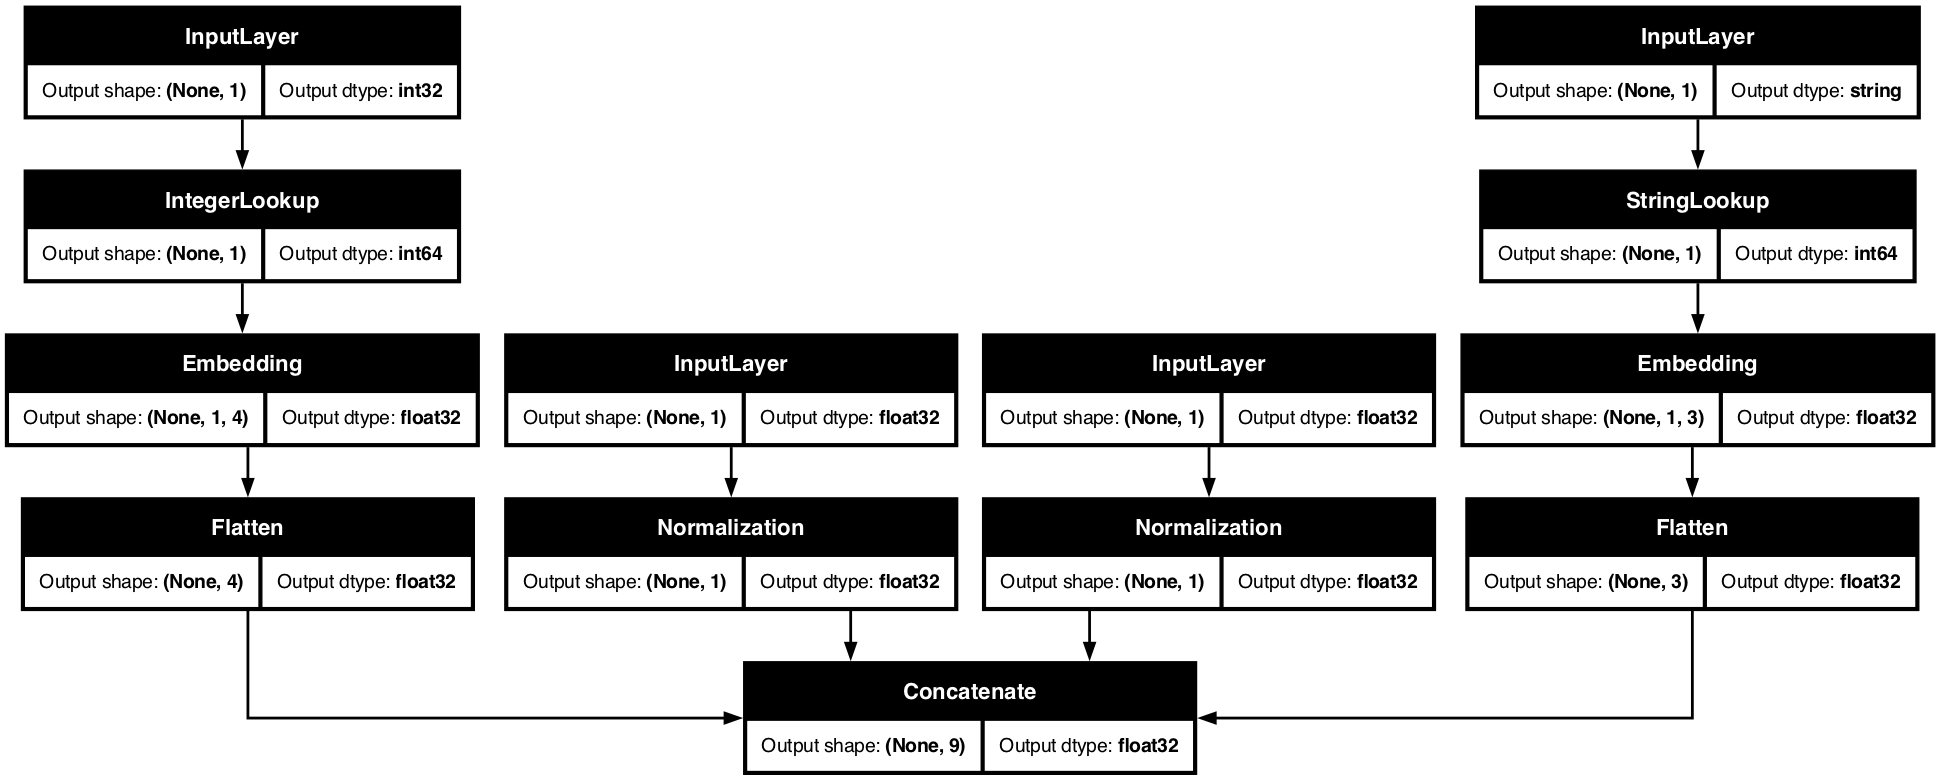

In [17]:
ppr.plot_model()